<h3>What is Sharp Ratio?</h3>

The Sharpe ratio has been one of the most popular risk/return measures in finance.It compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other.In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference.A higher Sharpe ratio means that the reward will be higher for a given amount of risk.It is common to compare a specific opportunity against a benchmark that represents an entire category of investments.The Sharpe ratio is usually calculated for a portfolio and uses the risk-free interest rate as benchmark. We use stocks instead of a portfolio and stock index as benchmark rather than the risk-free interest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Importing and Manipulating</h3>

In [27]:
stock_data=pd.read_csv('E:\work\DataSets\stock_data.csv',parse_dates=['Date'],index_col='Date')
benchmark_data=pd.read_csv('E:\work\DataSets\\benchmark_data.csv',parse_dates=['Date'],index_col='Date').dropna()

In [40]:
print('Stock\n')
display(stock_data.head())
print('Benchmark\n')
display(benchmark_data.head())

Stock



,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


Benchmark



,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


<h3>A first glance at the data</h3>

In [37]:
print('Benchmark\n')
display(benchmark_data.info())
print('Stock\n')
display(stock_data.info())

Benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


None

Stock

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


None

<h3>Plot & summarize daily prices for Amazon and Facebook</h3>

In [79]:
stock_data.describe()

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


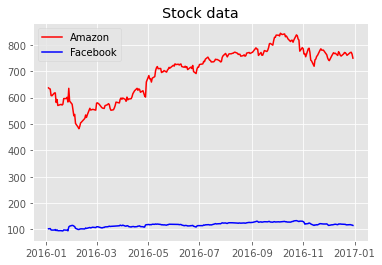

In [114]:
fig,ax=plt.subplots()
ax.plot(stock_data.index,stock_data['Amazon'],color='red',label='Amazon')
ax.plot(stock_data.index,stock_data['Facebook'],color='blue',label='Facebook')
ax.set_title('Stock data')
ax.legend()

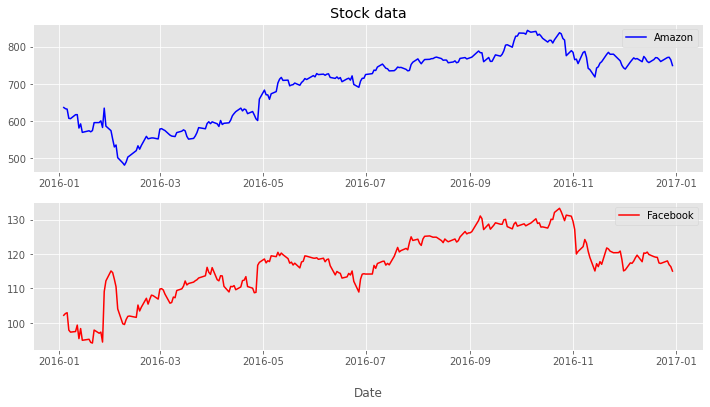

In [78]:
plt.style.use('ggplot')
fig,ax=plt.subplots(2,1,figsize=(12,6))
ax[0].plot(stock_data.index,stock_data['Amazon'],label='Amazon',color='b')
ax[1].plot(stock_data.index,stock_data['Facebook'],label='Facebook',color='r')
ax[1].set_xlabel('Date',labelpad=20)
ax[0].set_title('Stock data')
ax[0].legend()
ax[1].legend()
plt.show()

<h3>Visualize & summarize daily values for the S&P 500</h3>

In [81]:
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [96]:
benchmark_data.reset_index()

,Date,S&P 500
0,2016-01-04,2012.66
1,2016-01-05,2016.71
2,2016-01-06,1990.26
3,2016-01-07,1943.09
4,2016-01-08,1922.03
...,...,...
247,2016-12-23,2263.79
248,2016-12-27,2268.88
249,2016-12-28,2249.92
250,2016-12-29,2249.26


Text(0.5, 1.02, 'Benchmark data')

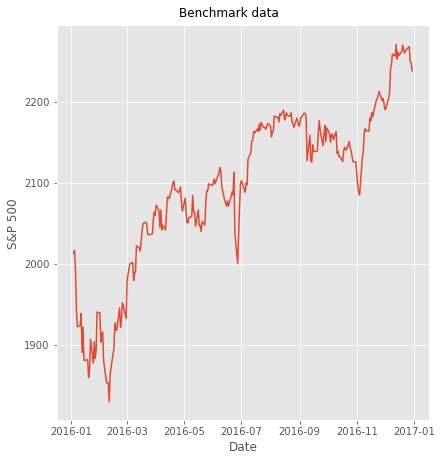

In [93]:
g=sns.relplot(x=benchmark_data.index,y='S&P 500',data=benchmark_data,kind='line',height=6)
g.fig.suptitle('Benchmark data',y=1.02)

<h3>The inputs for the Sharpe Ratio:</h3>

<h4> Daily Stock Returns and Daily S&P 500 Returns</h4>


The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.
However, our data show the historical value of each investment, not the return.To calculate the return, we need to calculate the percentage change in value from one day to the next.

In [139]:
stock_returns=stock_data.pct_change()


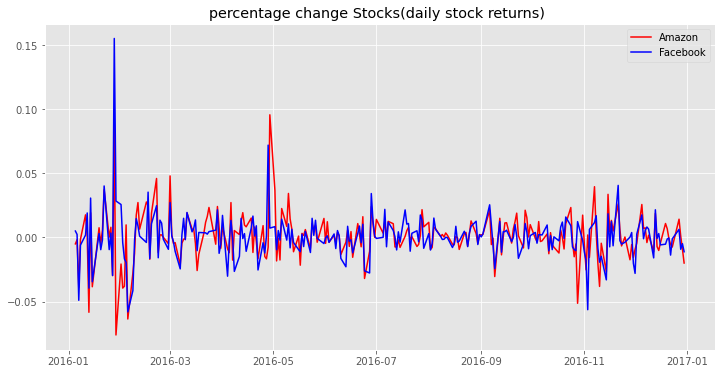

In [130]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(stock_returns.index,stock_returns['Amazon'],color='red',label='Amazon')
ax.plot(stock_returns.index,stock_returns['Facebook'],color='blue',label='Facebook')
ax.set_title('percentage change Stocks(daily stock returns) ')
ax.legend()

In [144]:
sp_returns=benchmark_data.pct_change()


In [129]:
sp_returns.describe()

,S&P 500
count,251.000000
mean,0.000458
std,0.008205
min,-0.035920
25%,-0.002949
50%,0.000205
75%,0.004497
max,0.024760


Text(0.5, 1.0, 'percentage change S&P 500(daily S&P returns)')

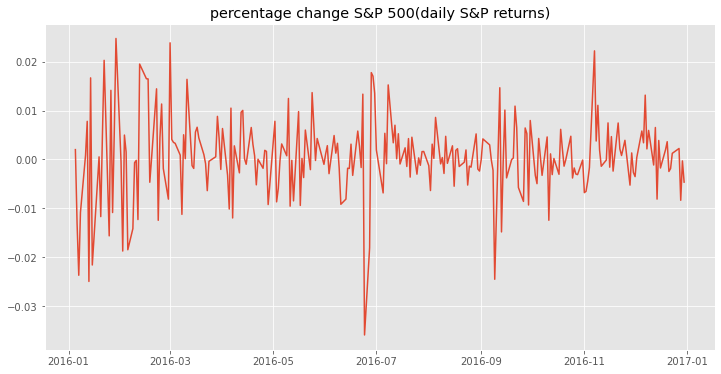

In [131]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(sp_returns.index,sp_returns['S&P 500'])
ax.set_title('percentage change S&P 500(daily S&P returns)')

<h3>Calculating Excess Returns for Amazon and Facebook vs. S&P 500</h3>

we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

In [152]:
sp_returns=benchmark_data.pct_change().values
excess_returns=stock_returns.subtract(sp_returns,axis=0)


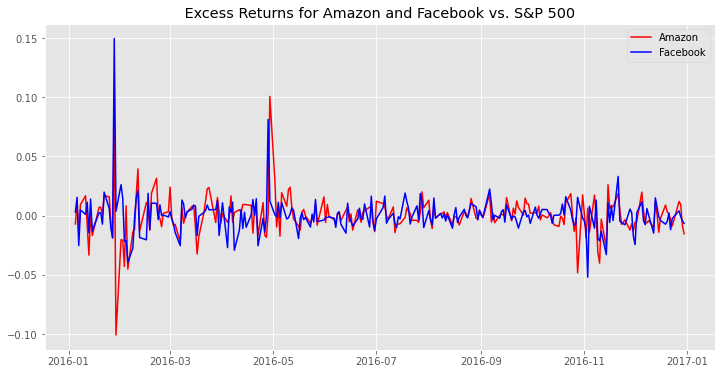

In [154]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(excess_returns.index,excess_returns['Amazon'],color='red',label='Amazon')
ax.plot(excess_returns.index,excess_returns['Facebook'],color='blue',label='Facebook')
ax.set_title(' Excess Returns for Amazon and Facebook vs. S&P 500 ')
ax.legend()

<h3>The Sharpe Ratio</h3>
<h4>1)The Average Difference in Daily Returns Stocks vs S&P 500</h4>
<h4>2)Standard Deviation of the Return Difference</h4>

Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

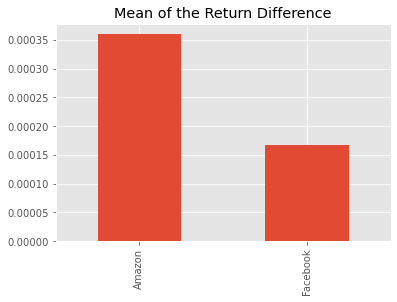

In [155]:
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Mean of the Return Difference')

It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

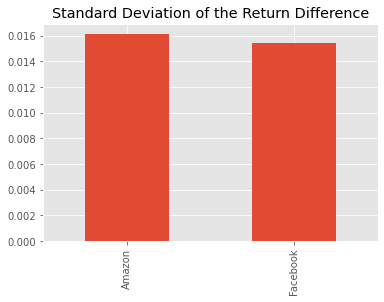

In [156]:
sd_excess_return = excess_returns.std()
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

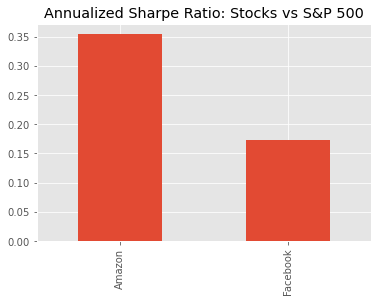

In [157]:
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500');
